Topic analysis from user hotel reivews on TripAdvisor

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1AvhEJTl6NprW7QO7RF_v3HRbzSlAANTv)


Step - 1: Text Analysis
  * Loading configuration YAML
  * Creating filters specified in the configuration
  * Loading the csv data into Pandas dataframe



In [ ]:
!python3 -m pip install nltk
!python3 -m nltk.downloader punkt
!python3 -m nltk.downloader stopwords
!python3 -m nltk.downloader wordnet
!python3 -m pip install pyyaml

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data.

In [ ]:
import pandas as pd
import requests
import yaml

tripadvisor_review_data = 'https://raw.githubusercontent.com/krishanuc/CapstoneProjectData/refs/heads/tripadvisor-dataset/tripadvisor/tripadvisor_hotel_reviews.csv'
tripadvisor_config = 'https://raw.githubusercontent.com/krishanuc/CapstoneProjectData/refs/heads/tripadvisor-dataset/tripadvisor/tripadvisor_config.yaml'

def open_yaml_from_uri(uri):
    response = requests.get(uri)
    response.raise_for_status()  # Raise an exception for bad status codes

    yaml_data = yaml.safe_load(response.text)
    return yaml_data

config = open_yaml_from_uri(tripadvisor_config)
# print(config)

rating_level_filter = config['rating_level_filter']
stop_word_filtering = config['stop_word_filtering']
manual_stop_word_filtering = config['manual_stop_word_filtering']
lemmetization = config['lemmetization']

def override_configuration():
    # global stop_word_filtering
    # stop_word_filtering = False
    global rating_level_filter
    rating_level_filter = 5

# Load thre review data from csv file into Pandas data frame
ta_reviews_df = pd.read_csv(tripadvisor_review_data)

# Print info to check columns types, rows count, and if there are null values in the columns
# print(ta_reviews_df.info())
# print(ta_reviews_df['Review'].dtypes)
# print(list(ta_reviews_df.columns))
# print(ta_reviews_df['Review'])
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string')
print(ta_reviews_df['Review'].dtypes)

# override_configuration()

print("Rating level filter : ", rating_level_filter)
ta_reviews_df = ta_reviews_df[ta_reviews_df['Rating'] <= rating_level_filter]

pd.set_option('display.max_colwidth', None)
ta_reviews_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


string
Rating level filter :  5


,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


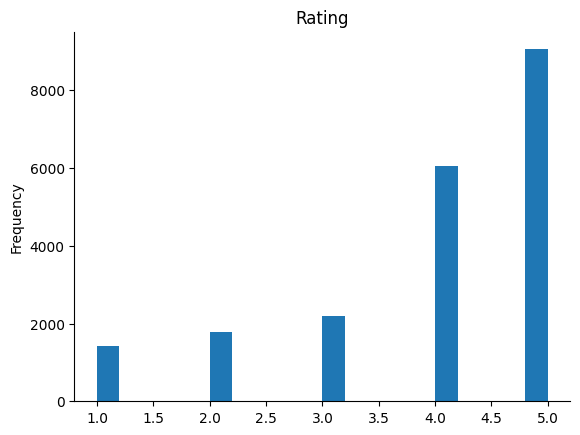

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
ta_reviews_df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


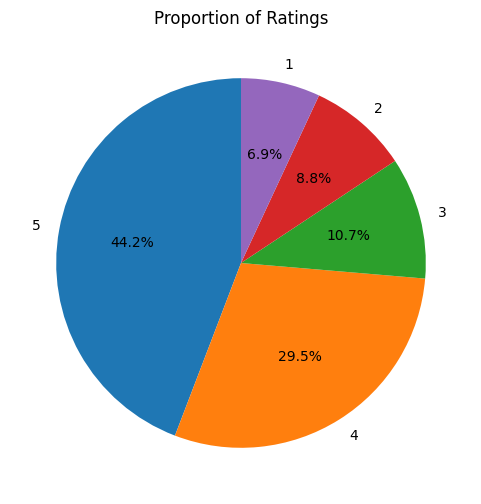

In [ ]:
# @title Proportion of Ratings

import matplotlib.pyplot as plt

rating_counts = ta_reviews_df['Rating'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Proportion of Ratings')

Step - 2 : Text Cleanup
  * Removal of hyperlinks
  * Removal of @ mentions
  * Removal of hashtag
  * Removal of punctuations
  * Converting text to lower case

In [ ]:
import re

# Convert Review column as string
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string')

print(ta_reviews_df.dtypes)

# Pre-processing
# Remove links
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: re.sub(r"(www|http|https|pic)([a-zA-Z\.0-9:=\\~#/_\&%\?\-])*", ' ', x))

# Remove mention symbol
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.replace('@', ''))

# Remove hashtag symbol
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.replace('#', ''))

# Remove punctuations
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string').apply(lambda x: re.sub(r"[^\w\s]", '',x))

# Convert all text to lower case (this helps in vectorization and training)
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.lower())

#print(ta_reviews_df.dtypes)

# Print info after pre-processing
#print(ta_reviews_df.info())

pd.set_option('display.max_colwidth', None)

ta_reviews_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review    string[python]
Rating             int64
dtype: object


,Review,Rating
0,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night,4
1,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite 5 day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution send email trip guest survey did not follow email mail guess tell concerned guestthe staff ranged indifferent not helpful asked desk good breakfast spots neighborhood hood told no hotels gee best breakfast spots seattle 12 block away convenient hotel does not know exist arrived late night 11 pm inside run bellman busy chating cell phone help bagsprior arrival emailed hotel inform 20th anniversary half really wanted make sure good got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate told needed foam pillows arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property impressed left morning shopping room got short trips 2 hours beds comfortablenot good acheat control 4 x 4 inch screen bring green shine directly eyes night light sensitive tape controlsthis not 4 start hotel clean business hotel super high rates better chain hotels seattle,2
2,nice rooms not 4 experience hotel monaco seattle good hotel nt 4 levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did nt provide guidance special requeststv hard use ipod sound dock suite non functioning decided book mediterranean suite 3 night weekend stay 1st choice rest party filled comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice showerbefore stay hotel arrange car service price 53 tip reasonable driver waiting arrivalcheckin easy downside room 2 person jacuzi tub no bath accessories salts bubble bath did nt stay night got 121a checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken disappointingin morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept got room night no 1st drop desk called maintainence came look thermostat told play settings happy digital box wo nt work asked wakeup 10am morning did nt happen called later 6pm nap wakeup forgot 10am wakeup morning yep forgottenthe bathroom facilities great room surprised room sold whirlpool bath tub nt bath amenities great relax water jets going,3
3,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did nt partake free wine coffeetea service lobby thought great feature great

In [21]:
# Unit test

import re

def test_remove_punctuation():
    # Test cases with expected outcomes
    test_cases = [
        ("This is a test string, with lots of: punctuations; in it?!.", "This is a test string with lots of punctuations in it"),
        ("Hello, world!", "Hello world"),
        ("123.456", "123456"),
        ("", "")  # Empty string
    ]
    for text, expected in test_cases:
        # Apply the punctuation removal function from your code
        # Changed to also remove extra spaces resulting from the punctuation removal
        actual = re.sub(r"[^\w\s]", '', text)

        # Assert that the actual output matches the expected output
        assert actual == expected, f"For input '{text}', expected '{expected}', but got '{actual}'"
    print("\nTest case passed successfully!\n\n")

test_remove_punctuation()


Test case passed successfully!





Step 3 : Text preprocessing and topic extraction using Latent Dirichlet Allocation (LDA).
  * Tokenization
  * Stop word filtering
  * Lemmatization
  * Topic extraction

In [ ]:
import gensim
from gensim import corpora
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

merged_ta_reviews = ta_reviews_df['Review'].tolist()
print("Number of reviews is ", len(merged_ta_reviews))
#print(merged_ta_reviews)

def total_word_count(reviews):
    total_words = 0
    for review in reviews:
        total_words += len(review.split())
    return total_words

total_word_count = total_word_count(merged_ta_reviews)
print("Total number of words in all reviews is ", total_word_count)
print("\n\n")

# Preprocess the text (tokenization, stopwords removal)
stop_words = set(stopwords.words("english"))

print('Number of stop words = ', len(stop_words))
print("Stop words =>",stop_words)

manual_stop_words = ["hotel","nt"]

lemmatizer = WordNetLemmatizer()

def print_lemmatized_token(intial_token_list, lemmatized_token_list):
    count = 0;
    for index in range(len(intial_token_list)):
      if lemmatized_token_list[index] != intial_token_list[index]:
        # print(intial_token_list[index], lemmatized_token_list[index])
        count += 1
    print("Lemmatized ", count, " of ", len(lemmatized_token_list), " words")

# Tokenization
# Stop word filtering
# Lemmatization
def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    # converts the words in tokens to lower case and then checks whether
    # they are present in stop_words or not
    filtered_tokens = [wd for wd in tokens if not wd.lower() in stop_words] if stop_word_filtering else tokens
    manually_filtered_tokens = [fw for fw in filtered_tokens if not fw.lower() in manual_stop_words] if manual_stop_word_filtering else filtered_tokens

    # Lemmatizing words
    lemmatized_filtered_tokens = [lemmatizer.lemmatize(token) for token in manually_filtered_tokens] if lemmetization else manually_filtered_tokens
    # print_lemmatized_token(manually_filtered_tokens, lemmatized_filtered_tokens)
    return lemmatized_filtered_tokens

print("\n")
print("Stop word filtering : ", stop_word_filtering)
print("Manual stop word filtering : ", manual_stop_word_filtering)
print("Lemmetization : ", lemmetization)
print("\n\n")

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in merged_ta_reviews]
print("Number of processed documents = ", len(processed_docs))

def total_processed_word_count(docs):
    total_words = 0
    for doc in docs:
        total_words += len(doc)
    return total_words

total_words_after_processing = total_processed_word_count(processed_docs)
print("Total number of words in all reviews after processing is ", total_words_after_processing)


# Analyzes all the documents and creates a vocabulary of all the unique words it finds.
# It assigns a unique numerical ID to each word in the vocabulary.
# This dictionary acts as a lookup table, allowing to:
# Convert a word into its corresponding ID.
# Convert an ID back into the original word.
dictionary = corpora.Dictionary(processed_docs)
print("Total number of unique words in all reviews after processing is ", len(dictionary))

# Document-Term Matrix is a mathematical representation of a collection of documents. It's essentially a table where:
# Each row represents a document in your corpus (in your case, a hotel review).
# Each column represents a unique term (word) found across all your documents.
# The cells in the matrix contain the frequency or weight of each term in each document. This shows how important a word is to a document.

# doc2bow : Convert document to bag of words
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Online Latent Dirichlet Allocation (LDA) (see Hoffman et al.), using all CPU cores to parallelize and speed up model training.
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=50, id2word=dictionary, passes=1)

# Print N topics.
# The documentation states that the topics returned are in no particular order
n_topics = 20
topics = lda_model.print_topics(num_topics=n_topics, num_words=10)
print("\n\n")
print("Top ", n_topics, " topics")
for topic in topics:
    print(topic)

print("\n\n")
print("LDA sample model entry",lda_model[doc_term_matrix[10]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of reviews is  20491
Total number of words in all reviews is  2136192



Number of stop words =  179
Stop words => {'at', "hadn't", 'hers', 'while', 'out', "needn't", 'were', "haven't", 'over', 'me', "wouldn't", 'other', "shouldn't", 'having', 'shan', 'those', 'aren', 'shouldn', 'your', 'what', 'into', 'doesn', 'it', 'between', 'which', 'herself', 'no', 'have', 'ain', 'up', 'd', "aren't", 'all', 'o', 'both', 'than', 'needn', 'the', "that'll", 'him', 'just', 'too', 'nor', 'own', 'couldn', 'only', "she's", 'you', 'theirs', 'being', 'll', 'of', 'mightn', 'who', "don't", 'had', 'after', 'now', "you're", 't', 'below', "it's", 'ourselves', 'why', 'under', 'can', 'again', 'we', 'wouldn', 'how', 'my', 'once', 'few', 'before', 'haven', "mustn't", 'with', 'then', 'during', 'yourself', 'each', 'because', 'down', 'more', 'whom', 'such', 'yours', 'himself', 'is', "couldn't", 'where', 'these', 'there', "mightn't", 'as', 'has', 'by', 'against', 'from', 's', 'them', "doesn't", 'if', 'its', 'any

In [ ]:
!pip install pyLDAvis==3.4.1  # Install pyLDAvis for visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic distrubition in 3 documents selected at random.
(Posterior distribution of **Θ**)
* Shows the sparcity of the per document topic proportions.
* Document number will change in each run.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


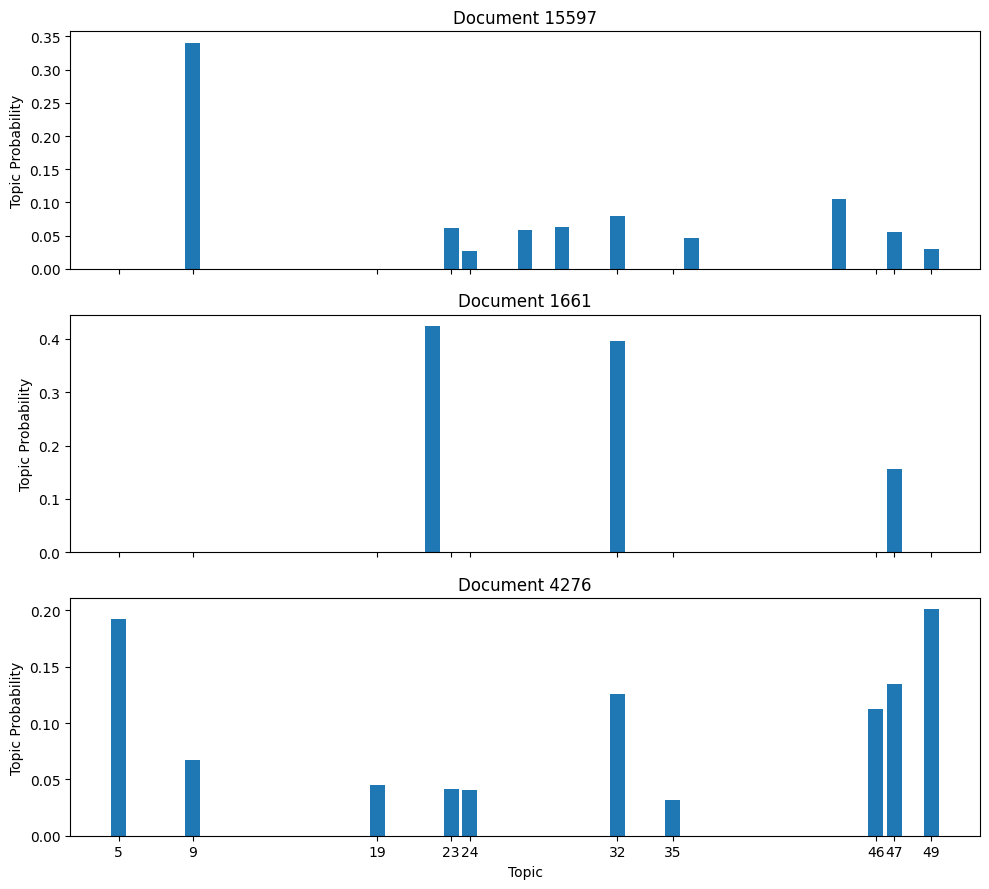

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get the total number of documents
num_docs = len(doc_term_matrix)

# Randomly select 3 document indices
sample_doc_indices = random.sample(range(num_docs), 3)
# print(sample_doc_indices)

# Get topic distributions for the selected documents
sample_topic_distributions = [lda_model[doc_term_matrix[i]] for i in sample_doc_indices]

# Choose the number of top topics to display
top_n_topics = 10

top_topics_per_doc = []
for doc_dist in sample_topic_distributions:
    sorted_topics = sorted(doc_dist, key=lambda x: x[1], reverse=True)  # Sort by probability
    top_topics = [(topic_idx, topic_prob) for topic_idx, topic_prob in sorted_topics[:top_n_topics]]
    # print(top_topics)
    top_topics_per_doc.append(top_topics)

num_docs = len(sample_topic_distributions)

fig, axes = plt.subplots(num_docs, 1, figsize=(10, num_docs * 3), sharex=True)

for doc_idx, top_topics in enumerate(top_topics_per_doc):
    topic_indices, topic_probs = zip(*top_topics)
    axes[doc_idx].bar(topic_indices, topic_probs)
    axes[doc_idx].set_title(f'Document {sample_doc_indices[doc_idx] + 1}')
    axes[doc_idx].set_ylabel('Topic Probability')
    axes[doc_idx].set_xticks(topic_indices)

plt.xlabel('Topic')
plt.tight_layout()
plt.show()

In [ ]:
sample_doc_index = sample_doc_indices[2]
sample_doc = merged_ta_reviews[sample_doc_index]
sample_doc_topic_distributions = lda_model[doc_term_matrix[sample_doc_index]]
sorted_sample_doc_topic_distributions = sorted(sample_doc_topic_distributions, key=lambda x: x[1], reverse=True)
top_n_sorted_sample_doc_topic_distributions = sorted_sample_doc_topic_distributions[:5]
print("Document ", sample_doc_index+1)
print("Review =>", sample_doc)
print("\n")
print("Document Topic Distribution", top_n_sorted_sample_doc_topic_distributions)
print("\n")

for topic_idx, topic_prob in top_n_sorted_sample_doc_topic_distributions:
    topic_words = lda_model.show_topic(topic_idx, topn=10)
    print("Topic#", topic_idx)
    for word, probability in topic_words:
        print(word)
    print("\n")

Document  4276
Review => wedding bells ring weekend special daughter married saturday ceremony chelsea town small hall nontraditional occasion london parents wanted comfortable calm background organise day chose draycott hotel 26 cadogan gardens just king road chelsea room superb spacious quiet overlooking quiet gardens facility possible staff charming attentive friendly interested event saturday morning mountains backpacking honeymoon luggage lugged room pots tea brought smile morning flowers hairdresser photographer bridesmaid arrived went wedding smiles congratulations hottest day year reception small hours morning newly married couple arrived draycott hotel showers drinks luggage taken downstairs 230am cheerful waves night staffthe morning proud parents treated sumptous breakfast library courtesy friendliness intrusiveness watchwords hotel stayed hotels world best  


Document Topic Distribution [(49, 0.19978325), (5, 0.18859342), (32, 0.13486624), (47, 0.13451153), (46, 0.11038744

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualization of topic with principal components based partitioning

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()  # Enable visualization in Colab

# Prepare the data for visualization
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word cloud plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


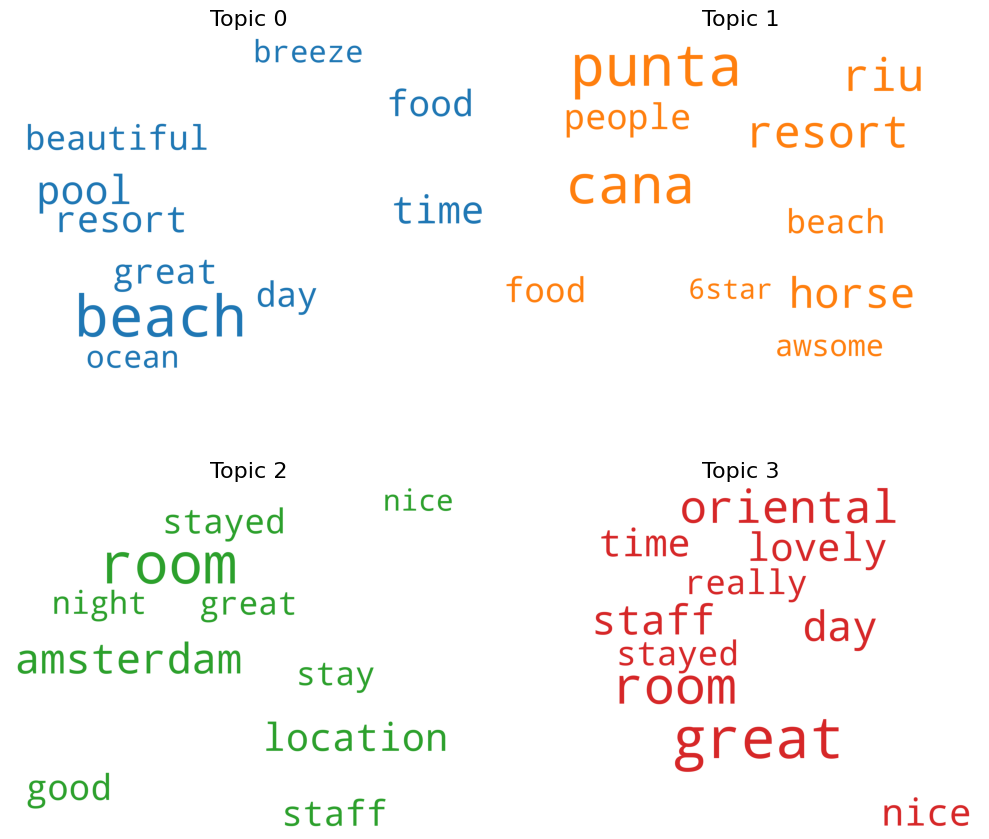

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Perplexity Score for the LDA model**
- **Lower is better**: A lower perplexity score generally suggests a better model fit. It means the model is better at predicting the words in unseen documents.
- **Comparison**: Perplexity is most useful for comparing different models or different configurations of the same model (like varying the number of topics).

In [ ]:
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print("\n")
print(f"Perplexity Score: {perplexity_score}")
print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




Perplexity Score: -10.689358425894168




**Coherence Score for the LDA model**
- **Higher is better**: A higher coherence score indicates that the words within a topic are semantically related and make sense together.
- **Coherence measures**: There are different coherence measures available (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi'). 'c_v' is often a good choice.

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("\n")
print(f"Coherence Score: {coherence_lda}")
print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




Coherence Score: 0.33776505076046653




**Sentiment Analysis**

Grouping documents by topics for setiment analysis
  - Get top topic in each document
  - Group documents in each topic

In [ ]:
import numpy as np

# Assign the most dominant topic for each document
doc_topics = [lda_model.get_document_topics(doc_term_matrix[i]) for i in range(len(doc_term_matrix))]
dominant_topics = [max(doc, key=lambda x: x[1])[0] for doc in doc_topics]


# Group documents by their dominant topic
topic_docs = {}
for i, topic in enumerate(dominant_topics):
    if topic not in topic_docs:
        topic_docs[topic] = []
    topic_docs[topic].append(merged_ta_reviews[i])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VADER (Valence Aware Dictionary and sEntiment Reasoner) based sentiment analysis
- This is a lexicon and rule-based sentiment analysis tool specifically for sentiments in social media.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Calculate sentiment for each document
sentiments = {}
for topic, docs in topic_docs.items():
    topic_sentiments = [sia.polarity_scores(doc) for doc in docs]
    sentiments[topic] = topic_sentiments


topic_sentiment_summary = {}
for topic, scores in sentiments.items():
    compound_scores = [score['compound'] for score in scores]
    avg_compound = np.mean(compound_scores)
    topic_sentiment_summary[topic] = avg_compound

topic_sentiment_list = [(topic, sentiment) for topic, sentiment in topic_sentiment_summary.items()]
sorted_topic_sentiment_list = sorted(topic_sentiment_list, key=lambda x: x[0])

print("\n")
print("Total number of topics => ",len(sorted_topic_sentiment_list))
print("\n")

# Output average sentiment for each topic
for topic, avg_sentiment in sorted_topic_sentiment_list:
    print(f"Topic {topic}: Average Sentiment = {avg_sentiment}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




Total number of topics =>  49


Topic 0: Average Sentiment = 0.9519799999999999
Topic 1: Average Sentiment = 0.6453000000000001
Topic 2: Average Sentiment = 0.9632499999999999
Topic 3: Average Sentiment = 0.6234923076923077
Topic 4: Average Sentiment = -0.92725
Topic 5: Average Sentiment = 0.9051835581787522
Topic 6: Average Sentiment = 0.47532499999999994
Topic 7: Average Sentiment = 0.9277442622950819
Topic 8: Average Sentiment = 0.3418145658263305
Topic 9: Average Sentiment = 0.7080303917688959
Topic 10: Average Sentiment = 0.5561
Topic 11: Average Sentiment = 0.7978909090909092
Topic 12: Average Sentiment = 0.9682
Topic 13: Average Sentiment = 0.8501574193548386
Topic 14: Average Sentiment = -0.8935
Topic 15: Average Sentiment = -0.05496666666666664
Topic 16: Average Sentiment = 0.2964
Topic 17: Average Sentiment = 0.8916046511627906
Topic 18: Average Sentiment = 0.9079161764705882
Topic 19: Average Sentiment = 0.9444757575757576
Topic 20: Average Sentiment = 0.17980909090909095


Plot VADER based sentiment by topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


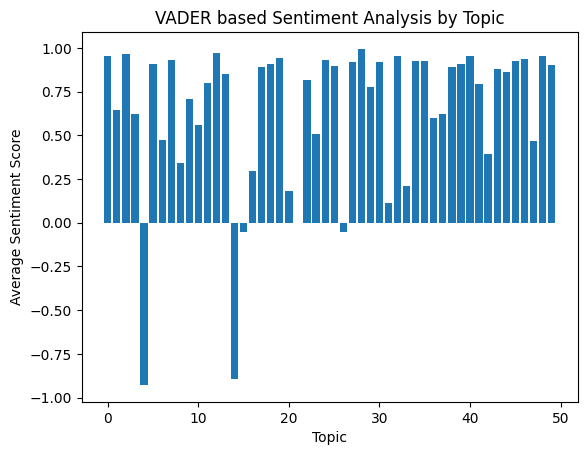

In [ ]:
import matplotlib.pyplot as plt

topics = list(topic_sentiment_summary.keys())
avg_sentiments = list(topic_sentiment_summary.values())

plt.bar(topics, avg_sentiments)
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.title('VADER based Sentiment Analysis by Topic')
plt.show()

TextBlob based sentiment analysis
-  TextBlob is a Python library built on top of NLTK and Pattern, and it provides a simple API for common natural language processing (NLP) tasks, including sentiment analysis.

In [ ]:
!python3 -m pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

# Calculate sentiment for each document
tb_sentiments = {}
for topic, docs in topic_docs.items():
    tb_topic_sentiments = [TextBlob(doc).sentiment.polarity for doc in docs]
    tb_sentiments[topic] = tb_topic_sentiments

tb_sentiment_summary = {}
for topic, scores in tb_sentiments.items():
    avg_scores = np.mean(scores)
    tb_sentiment_summary[topic] = avg_scores

tb_topic_sentiment_list = [(topic, score) for topic, score in tb_sentiment_summary.items()]
sorted_tb_topic_sentiment_list = sorted(tb_topic_sentiment_list, key=lambda x: x[0])

print("\n")
print("Total number of topics => ",len(sorted_tb_topic_sentiment_list))
print("\n")

# Output Text Blob sentiment for each topic
for topic, tb_sentiment_score in sorted_tb_topic_sentiment_list:
    print(f"Topic {topic}: Sentiment Polarity: {tb_sentiment_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




Total number of topics =>  49


Topic 0: Sentiment Polarity: 0.4405603594553595
Topic 1: Sentiment Polarity: 0.41339397639397646
Topic 2: Sentiment Polarity: 0.4717144951822372
Topic 3: Sentiment Polarity: 0.3414868603618604
Topic 4: Sentiment Polarity: -0.3806547619047619
Topic 5: Sentiment Polarity: 0.2703519620220592
Topic 6: Sentiment Polarity: 0.254375
Topic 7: Sentiment Polarity: 0.3862289653013773
Topic 8: Sentiment Polarity: 0.10001925635417808
Topic 9: Sentiment Polarity: 0.18688696985663644
Topic 10: Sentiment Polarity: 0.14176732390702979
Topic 11: Sentiment Polarity: 0.4482046571153715
Topic 12: Sentiment Polarity: 0.266
Topic 13: Sentiment Polarity: 0.28865916589853724
Topic 14: Sentiment Polarity: -0.003009259259259261
Topic 15: Sentiment Polarity: 0.055284090909090915
Topic 16: Sentiment Polarity: 0.10772498794860733
Topic 17: Sentiment Polarity: 0.3703762279109603
Topic 18: Sentiment Polarity: 0.3049411526370708
Topic 19: Sentiment Polarity: 0.39078593651552834
Topic 

Plot TextBlob based sentiment by topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


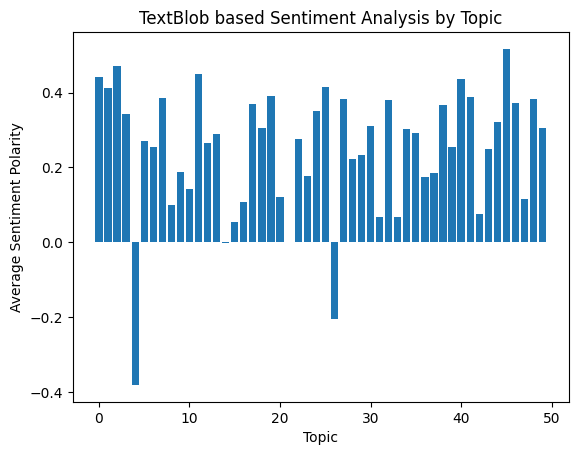

In [ ]:
import matplotlib.pyplot as plt

topics = list(tb_sentiment_summary.keys())
tb_sentiments = list(tb_sentiment_summary.values())

plt.bar(topics, tb_sentiments)
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Polarity')
plt.title('TextBlob based Sentiment Analysis by Topic')
plt.show()